In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:.6f}'.format
plt.style.use("seaborn-v0_8")

In [2]:
msft = pd.read_csv("msft.csv", index_col="Date", parse_dates = ["Date"])

In [3]:
msft

,Price,Returns
Date,,
2014-10-01,45.900002,NaN
2014-10-02,45.759998,-0.003050
2014-10-03,46.090000,0.007212
2014-10-06,46.090000,0.000000
2014-10-07,45.529999,-0.012150
...,...,...
2024-02-12,415.260010,-0.012579
2024-02-13,406.320007,-0.021529
2024-02-14,409.489990,0.007802


In [4]:
msft["log_ret"] = np.log(msft.Price / msft.Price.shift())
msft

,Price,Returns,log_ret
Date,,,
2014-10-01,45.900002,NaN,NaN
2014-10-02,45.759998,-0.003050,-0.003055
2014-10-03,46.090000,0.007212,0.007186
2014-10-06,46.090000,0.000000,0.000000
2014-10-07,45.529999,-0.012150,-0.012225
...,...,...,...
2024-02-12,415.260010,-0.012579,-0.012658
2024-02-13,406.320007,-0.021529,-0.021764
2024-02-14,409.489990,0.007802,0.007771


In [9]:
msft.log_ret.agg(["mean","std"])
#평균 수익률 0.1%
#표준편차 1.7%

mean   0.000922
std    0.017370
Name: log_ret, dtype: float64

In [10]:
#로그수익률의 평균을 연으로 곱하여 연간 기대수익률을 나타낼 수 있다.
ann_mu = msft.log_ret.mean() * 252
ann_mu

0.23225625119031998

In [14]:
#연환산 평균 수익률(ann_mu)를 활용하여 연평균 성장률을 산출할 수도 있다.
carg = np.exp(ann_mu) -1
carg

0.2614429336690216

In [15]:
ann_std = msft.log_ret.std() * np.sqrt(252) 
#sqrt()메서드를 활용하여 일일 평균 수익률의 기준편차를 연환산화 할 수 있다.
#연간 수익률의 표준편차가 높을수록 해당 주식의 가격이 연간으로 얼마나 변동하는지를 나타내며, 
#이는 투자의 위험 수준을 평가하는 데 중요한 지표이다.
ann_std

0.2757334236350254

### Resampling/Smoothing

In [16]:
msft.head(25)

,Price,Returns,log_ret
Date,,,
2014-10-01,45.900002,NaN,NaN
2014-10-02,45.759998,-0.003050,-0.003055
2014-10-03,46.090000,0.007212,0.007186
2014-10-06,46.090000,0.000000,0.000000
2014-10-07,45.529999,-0.012150,-0.012225
2014-10-08,46.779999,0.027454,0.027084
2014-10-09,45.849998,-0.019880,-0.020081
2014-10-10,44.029999,-0.039695,-0.040504
2014-10-13,43.650002,-0.008630,-0.008668


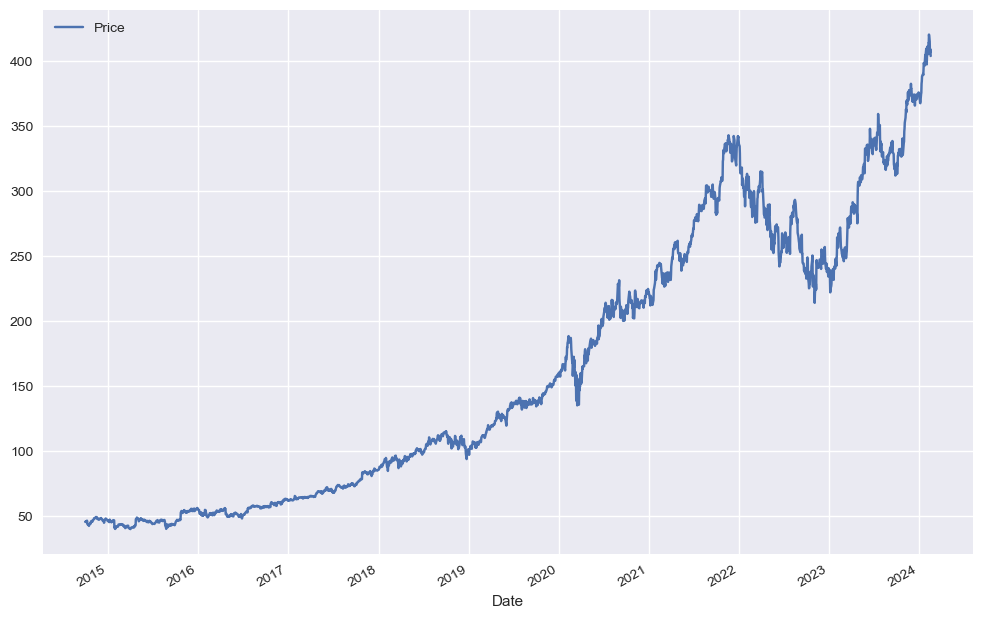

In [17]:
msft.Price.plot(figsize = (12,8))
plt.legend()
plt.show()

In [18]:
monthly = msft.Price.resample("M").last()
monthly

Date
2014-10-31    46.950001
2014-11-30    47.810001
2014-12-31    46.450001
2015-01-31    40.400002
2015-02-28    43.849998
                ...    
2023-10-31   338.109985
2023-11-30   378.910004
2023-12-31   376.040009
2024-01-31   397.579987
2024-02-29   404.059998
Freq: M, Name: Price, Length: 113, dtype: float64

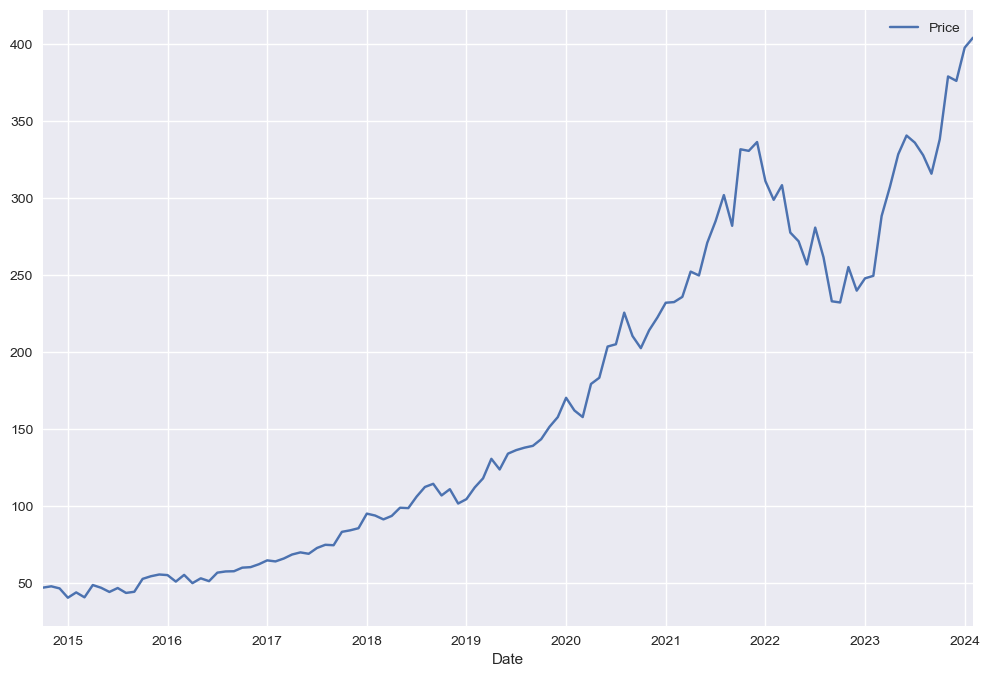

In [20]:
monthly.plot(figsize = (12, 8))
plt.legend()
plt.show()

In [21]:
freqs = ["A","Q","M","W-Fri","D"]
periods = [1, 4, 12, 52, 252]
ann_mean = []
ann_std = []

In [23]:
for i in range(5):
    resamp = msft.Price.resample(freqs[i]).last()
    ann_mean.append(np.log(resamp / resamp.shift()).mean() * periods[i])
    ann_std.append(np.log(resamp / resamp.shift()).std() * np.sqrt(periods[i]))

In [24]:
ann_mean

[0.21631868940584004,
 0.23385804260090814,
 0.23062287362559586,
 0.230859515370976,
 0.2572263989353639]

In [25]:
ann_std

[0.2386883256592356,
 0.207205538019092,
 0.2152864136630449,
 0.2391016054231904,
 0.27403131686835525]

In [26]:
summary = pd.DataFrame(data = {"ann_std":ann_std, "ann_mean":ann_mean}, index = freqs)
summary

,ann_std,ann_mean
A,0.238688,0.216319
Q,0.207206,0.233858
M,0.215286,0.230623
W-Fri,0.239102,0.230860
D,0.274031,0.257226


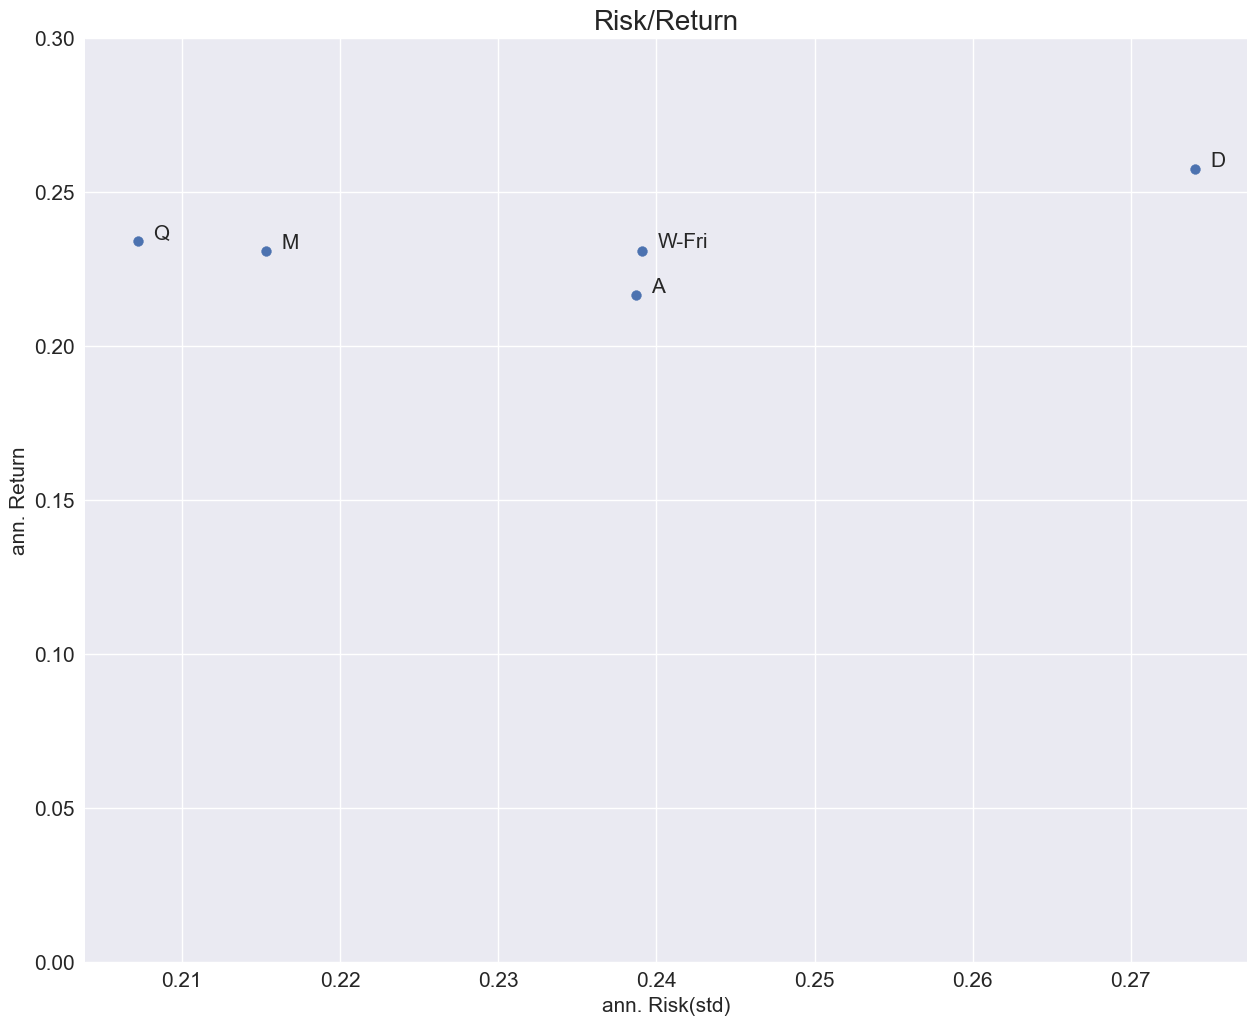

In [30]:
summary.plot(kind = "scatter", x = "ann_std", y = "ann_mean", figsize = (15,12), s = 50, fontsize = 15)
for i in summary.index:
    plt.annotate(i, xy=(summary.loc[i, "ann_std"]+0.001, summary.loc[i,"ann_mean"]+0.001), size =15)
plt.ylim(0, 0.3)
plt.xlabel("ann. Risk(std)", fontsize = 15)
plt.ylabel("ann. Return",fontsize = 15)
plt.title("Risk/Return", fontsize = 20)
plt.show()